# PyMech

<div align="center">
   <img src='PyMech_logo.png' width='280'/>
</div>

*Ian Viotti, 2022*

---

# Solução por Elementos Finitos vs Analítica

<div align = 'center'>
    <img src='flow_cart.png' width = '300'/>
</div>

---

## Modelo Femap

<div align = 'center'>
    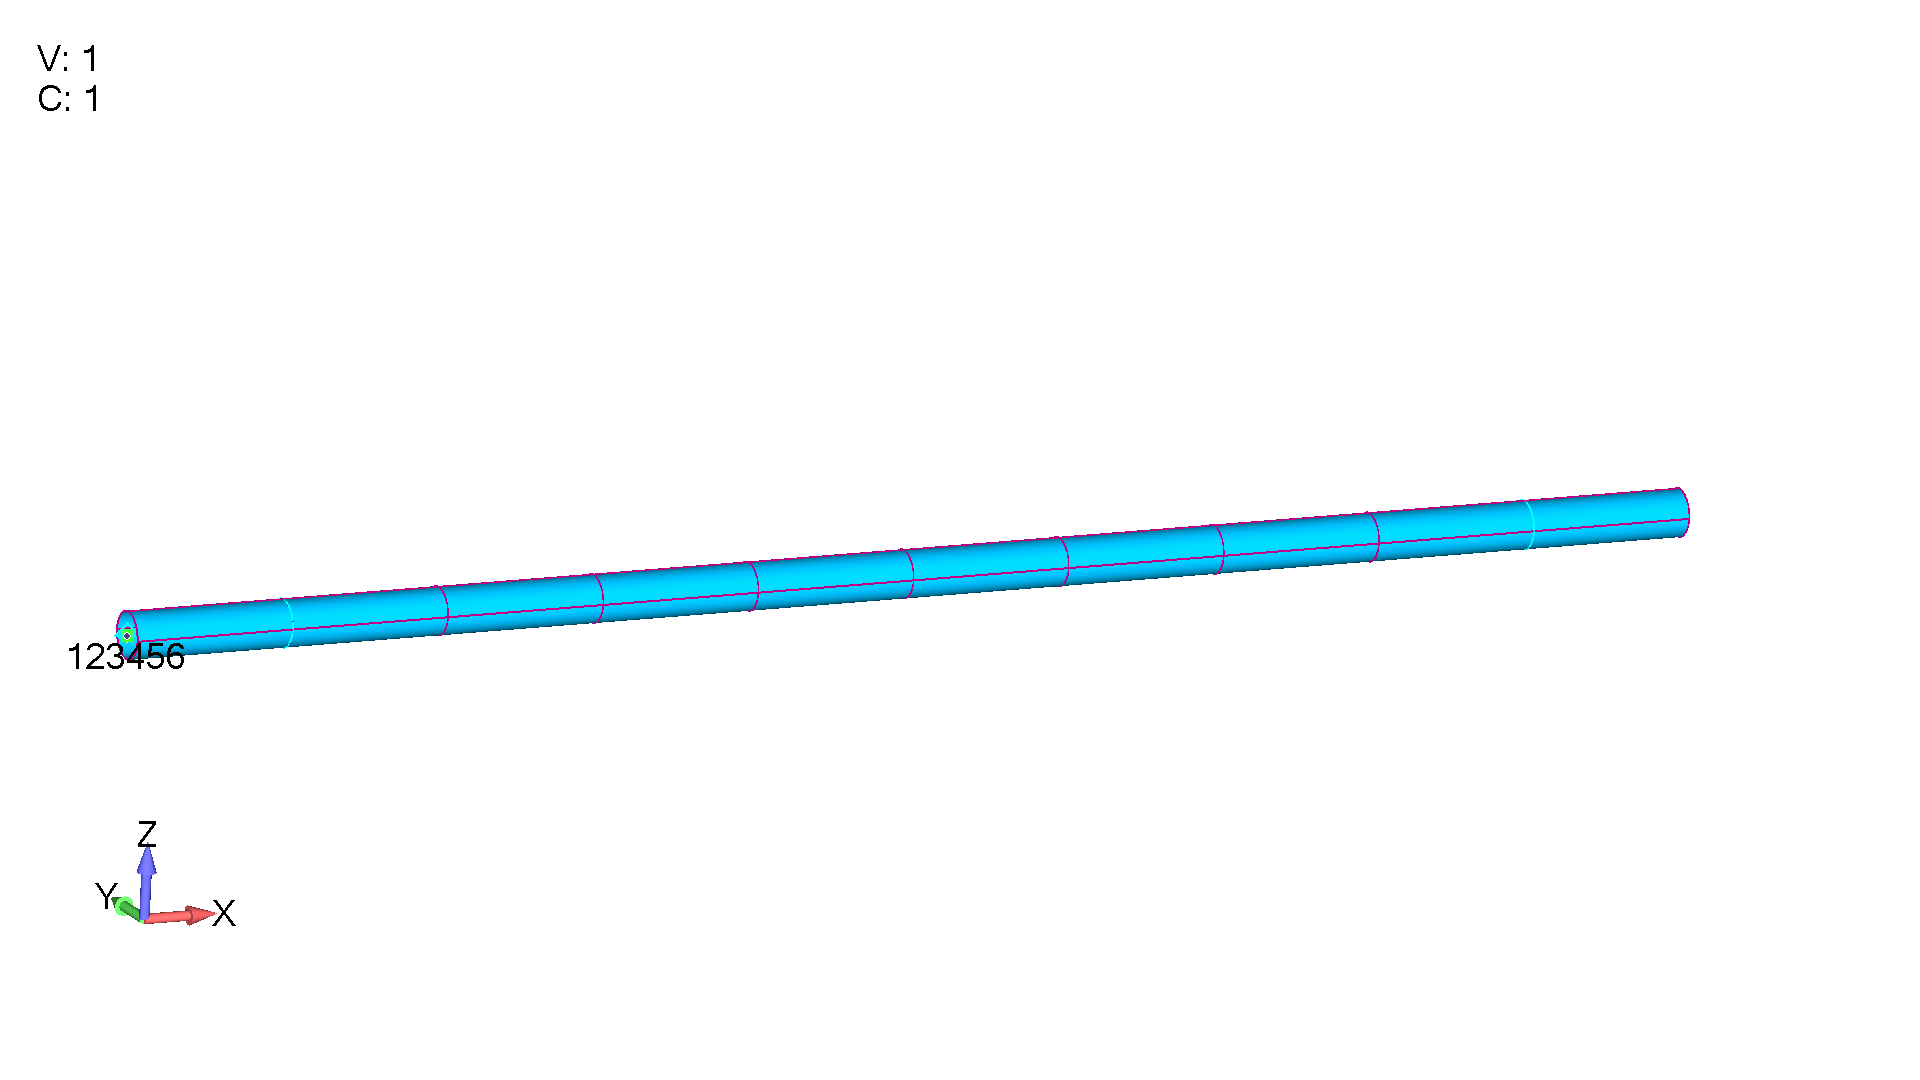
<div/>
    

Solução: Normal Modes/Eigenvalues

---

# PyNastran

A Python-based interface tool for Nastran's file formats

> https://github.com/SteveDoyle2/pyNastran

> `pip install pyNastran`

## Módulos

In [42]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pyNastran.op2.op2 import read_op2

## Importando o modelo

In [43]:
cw_path = os.path.abspath(os.getcwd())
model_path = os.path.join(cw_path, 'cantilever_beam', 'cantilever_beam-000.op2')

In [44]:
model_path

'C:\\Users\\Ian\\Desktop\\PyMech\\Projetos\\5_PyNastran\\cantilever_beam\\cantilever_beam-000.op2'

In [45]:
cantilever_beam = read_op2(model_path,  debug=False, build_dataframe=True, mode = 'nx')

self.cannot apply column_names=['Mode', 'Freq'] to RealStrainEnergyArray: 'BEAM'
self.cannot apply column_names=['Mode', 'EigenvalueReal'] to RealStrainEnergyArray: 'BEAM'


## Atributos do modelo

In [47]:
print(cantilever_beam.get_op2_stats(short=False))
#short=True

params:
  AUTOSPC = 'YES'
  GRDPNT = 0
  OGEOM = 'NO'
  POST = -1
  PRGPST = 'YES'
GridPointWeight['']:  reference_point=0
  mass=[   5.19169    5.19169    5.19169]
  cg = [         0         -0          0]
       [       0.5          0         -0]
       [       0.5          0          0]

  MO = [   5.19169          0          0          0          0          0]
       [         0    5.19169          0          0          0    2.59584]
       [         0          0    5.19169          0   -2.59584          0]
       [         0          0          0 0.000545783          0          0]
       [         0          0   -2.59584          0    1.73949          0]
       [         0    2.59584          0          0          0    1.73949]

  IS = [0.000545783         -0          0]
       [        -0   0.441566          0]
       [         0          0   0.441566]

  IQ = [0.000545783                      ]
       [             0.441566           ]
       [                        0.441566]



In [48]:
cantilever_beam.eigenvectors

{(1,
  2,
  1,
  0,
  0,
  '',
  ''):   isubcase = 1
   type=RealEigenvectorArray ntimes=10 nnodes=11, table_name=OUGV1
   data: [t1, t2, t3, r1, r2, r3] shape=[10, 11, 6] dtype=float32
   node_gridtype.shape = (11, 2)
   sort1
   modes = [ 1  2  3  4  5  6  7  8  9 10]
   eigns = [1.71863105e+04 1.71863105e+04 6.56283688e+05 6.56283750e+05
  4.99685050e+06 4.99685050e+06 1.85362140e+07 1.85362140e+07
  2.47111260e+07 4.86369640e+07]
   mode_cycles = [ 131.09657288  131.09657288  810.11340332  810.11340332 2235.36352539
  2235.36352539 4305.37011719 4305.37011719 4971.02880859 6974.02050781]}

In [49]:
indice = (1, 2, 1, 0, 0, '', '')

evec_fem = cantilever_beam.eigenvectors.get(indice)

evec_df = evec_fem.data_frame

evec_df

Mode                   1             2             3             4   \
Freq          20.864667     20.864667     128.933549    128.933555    
Eigenvalue   1.718631e+04  1.718631e+04  6.562837e+05  6.562838e+05   
Radians       131.096570    131.096570    810.113379    810.113418    
NodeID Item                                                           
1      t1    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       t2    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       t3    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       r1    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       r2    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...                   ...           ...           ...           ...   
11     t2   -8.741109e-01  1.132351e-05  8.518596e-01 -5.714636e-08   
       t3   -1.132351e-05 -8.741109e-01  5.714636e-08  8.518596e-01   
       r1   -3.462925e-17  5.668972e-16  1.133942e-15 -1.832734e-16   
       r2    1.562158e-05  1.205898e+00 -2.807335e-07 -4.184790e+00   
       r3   -1.205898e+00  1.562158e-05  4.184790e+00 -2.807335e-07   

Mode                   5             6             7             8   \
Freq          355.769169    355.769169    685.220976    685.220976    
Eigenvalue   4.996850e+06  4.996850e+06  1.853621e+07  1.853621e+07   
Radians       2235.363617   2235.363617   4305.370367   4305.370367   
NodeID Item                                                           
1      t1    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       t2    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       t3    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       r1    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
       r2    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
...                   ...           ...           ...           ...   
11     t2   -8.132068e-01 -1.904795e-08  7.514368e-01 -1.137354e-07   
       t3   -1.904795e-08  8.132068e-01 -1.137354e-07 -7.514368e-01   
       r1   -8.291601e-15  2.368711e-14  4.063890e-15  1.047810e-12   
       r2    1.620311e-07 -6.917534e+00  1.466497e-06  9.688974e+00   
       r3   -6.917533e+00 -1.620312e-07  9.688973e+00 -1.466497e-06   

Mode                   9             10  
Freq          791.163784    1109.949859  
Eigenvalue   2.471113e+07  4.863696e+07  
Radians       4971.028666   6974.020648  
NodeID Item                              
1      t1    0.000000e+00  0.000000e+00  
       t2    0.000000e+00  0.000000e+00  
       t3    0.000000e+00  0.000000e+00  
       r1    0.000000e+00  0.000000e+00  
       r2    0.000000e+00  0.000000e+00  
...                   ...           ...  
11     t2    1.020854e-14  6.654350e-01  
       t3    8.825670e-15 -2.607359e-08  
       r1    6.053480e+01  1.372368e-10  
       r2    2.228860e-11  4.770494e-07  
       r3   -1.006807e-11  1.217504e+01  

[66 rows x 10 columns]

In [50]:
evec_df.unstack(level=0)

Mode                 1                                             \
Freq        20.864667                                               
Eigenvalue 1.718631e+04                                             
Radians     131.096570                                              
NodeID               1             2             3             4    
Item                                                                
r1                  0.0 -1.465783e-18 -3.548263e-18 -5.792886e-18   
r2                  0.0  3.695306e-06  6.848014e-06  9.463688e-06   
r3                  0.0 -2.852568e-01 -5.286281e-01 -7.305434e-01   
t1                  0.0  2.408909e-18  2.763221e-18  1.620085e-18   
t2                  0.0 -1.467884e-02 -5.578731e-02 -1.191533e-01   
t3                  0.0 -1.901544e-07 -7.226863e-07 -1.543550e-06   

Mode                                                                \
Freq                                                                 
Eigenvalue                                                           
Radians                                                              
NodeID                5             6             7             8    
Item                                                                 
r1         -8.717272e-18 -1.778652e-17 -3.223824e-17 -3.081269e-17   
r2          1.155618e-05  1.315082e-05  1.428702e-05  1.502016e-05   
r3         -8.920719e-01 -1.015170e+00 -1.102877e+00 -1.159472e+00   
t1          3.548678e-18  1.763718e-18  6.150594e-20  7.731146e-19   
t2         -2.006771e-01 -2.964078e-01 -4.026429e-01 -5.160443e-01   
t3         -2.599634e-06 -3.839760e-06 -5.215962e-06 -6.684999e-06   

Mode                                    ...            10                \
Freq                                    ...   1109.949859                 
Eigenvalue                              ...  4.863696e+07                 
Radians                                 ...   6974.020648                 
NodeID                9             10  ...            2             3    
Item                                    ...                               
r1         -3.292173e-17 -3.792302e-17  ...  7.123889e-11 -8.265823e-11   
r2          1.542307e-05  1.558689e-05  ...  1.937573e-07 -1.442828e-07   
r3         -1.190574e+00 -1.203220e+00  ...  4.945096e+00 -3.682318e+00   
t1          1.166411e-18  2.149251e-18  ... -2.042853e-15 -4.620640e-15   
t2         -6.337678e-01 -7.536020e-01  ...  4.597930e-01  5.776463e-01   
t3         -8.210027e-06 -9.762396e-06  ... -1.801598e-08 -2.263378e-08   

Mode                                                                \
Freq                                                                 
Eigenvalue                                                           
Radians                                                              
NodeID                4             5             6             7    
Item                                                                 
r1          2.063838e-12  3.138068e-11  6.865721e-11 -9.757371e-11   
r2         -3.040815e-07  1.555947e-08  3.064137e-07  9.952353e-08   
r3         -7.760443e+00  3.971248e-01  7.819931e+00  2.539805e+00   
t1         -5.749790e-15 -1.000064e-14  1.881039e-14 -3.779621e-14   
t2         -1.380543e-01 -6.023957e-01 -8.094619e-02  5.754220e-01   
t3          5.409353e-09  2.360354e-08  3.171685e-09 -2.254663e-08   

Mode                                                                
Freq                                                                
Eigenvalue                                                          
Radians                                                             
NodeID                8             9             10            11  
Item                                                                
r1          9.260313e-12  2.608034e-11 -7.711237e-11  1.372368e-10  
r2         -2.658312e-07 -1.862990e-07  2.469612e-07  4.770494e-07  
r3         -6.784575e+00 -4.754118e+

In [51]:
evec_t3 = evec_df.unstack(level=0).T['t3']
evec_t3

Mode  Freq         Eigenvalue    Radians      NodeID
1     20.864667    1.718631e+04  131.096570   1         0.000000e+00
                                              2        -1.901544e-07
                                              3        -7.226863e-07
                                              4        -1.543550e-06
                                              5        -2.599634e-06
                                                            ...     
10    1109.949859  4.863696e+07  6974.020648  7        -2.254663e-08
                                              8        -1.191358e-08
                                              9         1.709861e-08
                                              10        1.460182e-08
                                              11       -2.607359e-08
Name: t3, Length: 110, dtype: float32

In [52]:
_t3 = []
for i in evec_t3:
    _t3.append(i)
    
_t3

[0.0,
 -1.9015435270830494e-07,
 -7.226863090181723e-07,
 -1.5435497289217892e-06,
 -2.5996341719292104e-06,
 -3.839760211121757e-06,
 -5.215962119109463e-06,
 -6.684998879791237e-06,
 -8.210026862798259e-06,
 -9.762396075529978e-06,
 -1.1323506441840436e-05,
 0.0,
 -0.01467884425073862,
 -0.05578731372952461,
 -0.11915334314107895,
 -0.20067711174488068,
 -0.2964078485965729,
 -0.4026429057121277,
 -0.5160442590713501,
 -0.63376784324646,
 -0.7536019682884216,
 -0.8741109371185303,
 0.0,
 -5.392134738713139e-09,
 -1.7431130316936105e-08,
 -3.0472641299184033e-08,
 -3.969372031065177e-08,
 -4.1669419914569517e-08,
 -3.4780409663426326e-08,
 -1.9294274622438934e-08,
 2.9545998980751165e-09,
 2.927621522985646e-08,
 5.7146358756199334e-08,
 0.0,
 -0.08037855476140976,
 -0.25983941555023193,
 -0.45424437522888184,
 -0.5916995406150818,
 -0.6211506128311157,
 -0.5184587240219116,
 -0.2876126170158386,
 0.04404313117265701,
 0.43640971183776855,
 0.8518596291542053,
 0.0,
 -4.60320626061161

In [53]:
t3 = np.reshape(_t3, (10, 11))/np.max(_t3)

In [54]:
nodes = np.arange(0,11,1)

modes = (1,3,5,7)

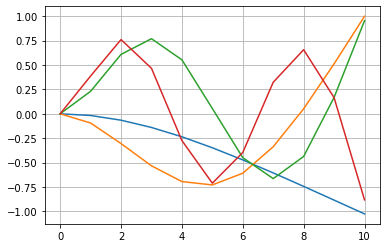

In [55]:
for mode in modes:
    plt.plot(nodes, t3[mode])
plt.grid()

---
# Solução Analítica

<div align = 'center'>
    <img src=anali_eq.png width='700'/>
</div>
     
> Fonte: Mechanical Vibrations, S. S. Rao

In [56]:
# Comprimento da viga
l = 10 

# Constantes do modo
b1 = -1.875104
b2 = -4.694091
b3 = 7.854757
b4 = 10.995541

bnl_ar = np.array([b1, b2, b3, b4])

# alpha_n e C_n
an = (np.sin(bnl_ar) + np.sinh(bnl_ar))/(np.cos(bnl_ar) + np.cosh(bnl_ar))
cn = 1

# Array da posição x da viga
x = np.linspace(0,l,100)

# Lista da deflexão para cada modo
yn = []
for i in range(len(bnl_ar)):
    y = cn*(np.sin(bnl_ar[i]/l*x) - np.sinh(bnl_ar[i]/l*x)) - an[i]*(np.cos(bnl_ar[i]/l*x) - np.cosh(bnl_ar[i]/l*x))
    yn.append(y)

In [57]:
yn

[array([ 0.00000000e+00, -4.86418695e-04, -1.93661519e-03, -4.33700016e-03,
        -7.67398458e-03, -1.19339800e-02, -1.71033989e-02, -2.31686554e-02,
        -3.01161659e-02, -3.79323496e-02, -4.66036298e-02, -5.61164345e-02,
        -6.64571980e-02, -7.76123615e-02, -8.95683751e-02, -1.02311699e-01,
        -1.15828804e-01, -1.30106175e-01, -1.45130311e-01, -1.60887730e-01,
        -1.77364966e-01, -1.94548575e-01, -2.12425135e-01, -2.30981251e-01,
        -2.50203553e-01, -2.70078701e-01, -2.90593390e-01, -3.11734346e-01,
        -3.33488335e-01, -3.55842162e-01, -3.78782675e-01, -4.02296769e-01,
        -4.26371385e-01, -4.50993519e-01, -4.76150221e-01, -5.01828597e-01,
        -5.28015816e-01, -5.54699112e-01, -5.81865787e-01, -6.09503212e-01,
        -6.37598835e-01, -6.66140184e-01, -6.95114865e-01, -7.24510572e-01,
        -7.54315090e-01, -7.84516294e-01, -8.15102159e-01, -8.46060758e-01,
        -8.77380272e-01, -9.09048990e-01, -9.41055311e-01, -9.73387755e-01,
        -1.0

## Plot

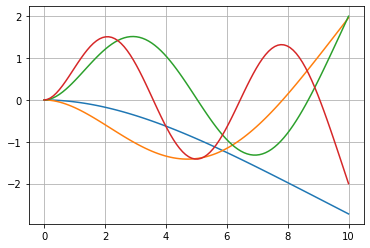

In [58]:
# Plot dos modos
for i in range(len(bnl_ar)):
    plt.plot(x, yn[i])
plt.grid()

---
# Comparação

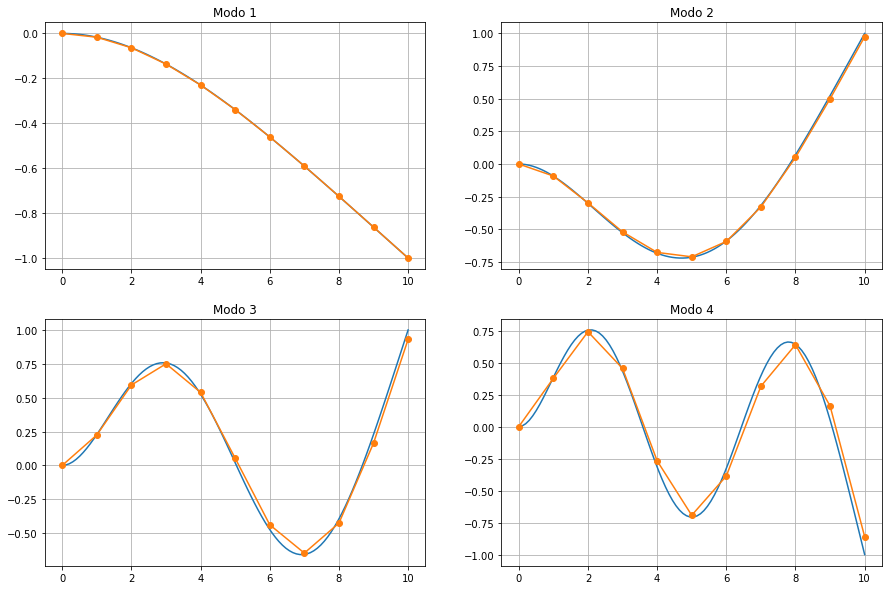

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

ax1[0].plot(x, yn[0]/np.max(np.abs(yn[0])))
ax1[0].plot(nodes, t3[1]/np.max(np.abs(t3)), 'o-')
ax1[0].grid()
ax1[0].set(title = 'Modo 1')

ax1[1].plot(x,yn[1]/np.max(np.abs(yn[1])))
ax1[1].plot(nodes, t3[3]/np.max(np.abs(t3)), 'o-')
ax1[1].grid()
ax1[1].set(title = 'Modo 2')

ax2[0].plot(x,yn[2]/np.max(np.abs(yn[2])))
ax2[0].plot(nodes, t3[5]/np.max(np.abs(t3)), 'o-')
ax2[0].grid()
ax2[0].set(title = 'Modo 3')

ax2[1].plot(x,yn[3]/np.max(np.abs(yn[3])))
ax2[1].plot(nodes, t3[7]/np.max(np.abs(t3)), 'o-')
ax2[1].grid()
ax2[1].set(title = 'Modo 4')

plt.show()

---

<div align="center">
   <img src='PyMech_logo.png' width='300'/>
</div>
